In [1]:
"""
This notebook contains a few simple examples of how to 
generate track length spectra in Paleo detectors using
the high level functions in CalcSpectra.py and 
for making plots of the spectra
"""

# load some useful packages
import numpy as np
import matplotlib.pyplot as plt
# and set some plotting settings
# Set up some plotting settings
fs = 14
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'legend.fontsize': fs,
                     'axes.labelsize': fs,
                     'axes.titlesize': fs,
                     'xtick.labelsize': fs,
                     'ytick.labelsize': fs})
plt.rcParams["figure.figsize"] = (9,7)

plt_colors = ['k',
              '#1b9e77',
              '#d95f02',
              '#7570b3',
              '#e7298a',
              '#66a61e',
              '#e6ab02',
              '#a6761d',
              '#666666']

# now let's load the paleoSpec package
import sys
sys.path.append("../../")
from paleoSpec import CalcSpectra

# and initialize the Spectrum Generator for your favorite mineral
mineral = "Gypsum"
switch_keep_H = False
SpecCalculator = CalcSpectra.CalcSpectra(mineral, switch_keep_H=switch_keep_H)

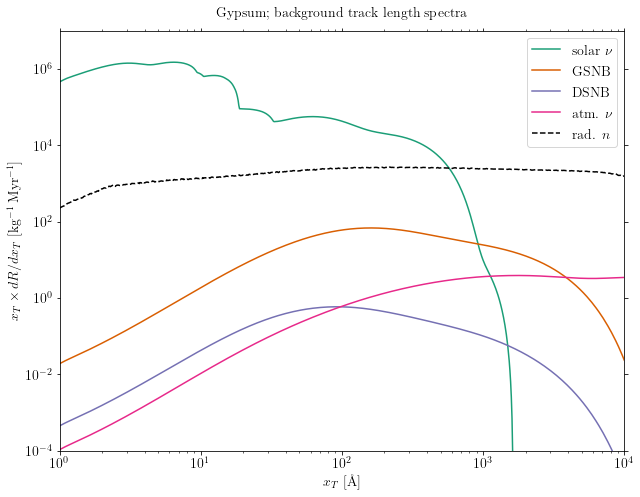

In [2]:
# let's compute the (unsmeared) background spectra and make a plot

C238 = 1e-11 # set the uranium-238 concentration in the sample [g/g]

# neutrino-induced backgrounds
bkg_nu_solar = SpecCalculator.calc_dRdx_BkgNeu_solar() # solar neutrino
bkg_nu_GSNB = SpecCalculator.calc_dRdx_BkgNeu_GSNB() # Galactic Supernova neutrinos
bkg_nu_DSNB = SpecCalculator.calc_dRdx_BkgNeu_DSNB() # Diffuse Supernova Neutrino Background (GSNB)
bkg_nu_atm = SpecCalculator.calc_dRdx_BkgNeu_atm() # atmospheric neutrinos
# radiogenic neutron background
bkg_rad_n = SpecCalculator.calc_dRdx_Bkgn(C238)

# plot the pectra
plt.close('all')
plt.plot(bkg_nu_solar[0], bkg_nu_solar[0]*bkg_nu_solar[1], color=plt_colors[1], label=r'solar $\nu$')
plt.plot(bkg_nu_GSNB[0], bkg_nu_GSNB[0]*bkg_nu_GSNB[1], color=plt_colors[2], label=r'GSNB')
plt.plot(bkg_nu_DSNB[0], bkg_nu_DSNB[0]*bkg_nu_DSNB[1], color=plt_colors[3], label=r'DSNB')
plt.plot(bkg_nu_atm[0], bkg_nu_atm[0]*bkg_nu_atm[1], color=plt_colors[4], label=r'atm. $\nu$')
plt.plot(bkg_rad_n[0], bkg_rad_n[0]*bkg_rad_n[1], color=plt_colors[0], linestyle='--', label=r'rad. $n$')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1e4)
plt.ylim(1e-4, 1e7)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dR/dx_T$ [kg$^{-1}$\,Myr$^{-1}$]')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+'; background track length spectra', y=1.02)
plt.tight_layout()
plt.show()

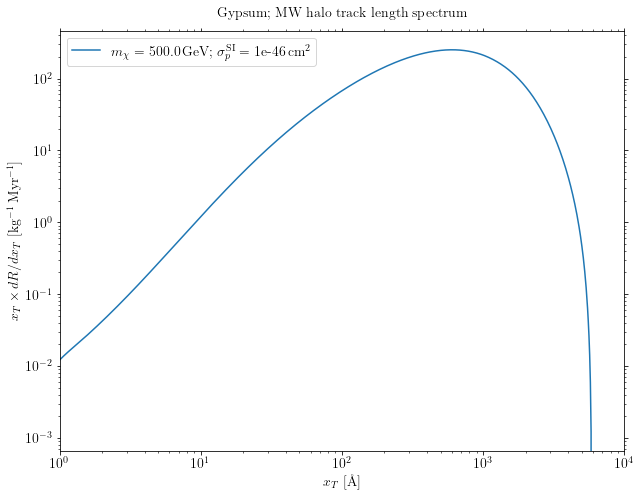

In [3]:
# let's compute the (unsmeared) spectrum induced 
# by the smooth dark matter halo of the Milky Way

mx = 500. # dark matter mass [GeV]
xsec = 1e-46 # Spin-independent WIMP-proton cross section [cm^2]

DM_MW = SpecCalculator.calc_dRdx_MW(mx, xsec)

"""
calc_dRdx_MW has additional kwargs with default values as indicated below:
    rhoDM=0.3 - local DM density in [GeV/cm^3]
    vrel=248.0 - relative speed wrt the galactic rest frame in [km/s]
    sigv=166.0 - velocity dispersion in [km/s]
    vesc=550.0 - escape velocity in [km/s]
"""

# plot the spectrum
plt.close('all')
plt.plot(DM_MW[0], DM_MW[0]*DM_MW[1], label=r'$m_\chi = $ '+str(mx)+r'\,GeV; $\sigma_p^{\rm SI} = $ '+str(xsec)+r'\,cm$^2$')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1e4)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dR/dx_T$ [kg$^{-1}$\,Myr$^{-1}$]')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+'; MW halo track length spectrum', y=1.02)
plt.tight_layout()
plt.show()

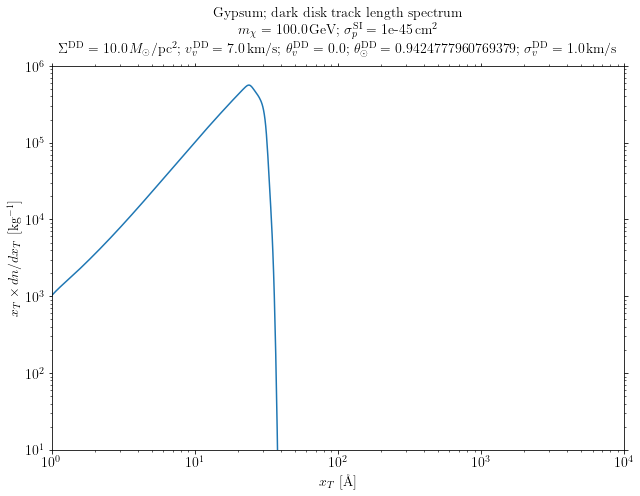

In [4]:
# let's compute the (unsmeared) spectrum induced 
# by passing through a dark disk

mx = 100. # dark matter mass [GeV]
xsec = 1e-45 # Spin-independent WIMP-proton cross section [cm^2]
SigDD = 10. # surface density of the dark disk [Msol/pc^2]
vvDD = 7. # vertical speed relative to the dark disk [km/s]
thetavDD = 0. # crossing angle of the solar system relative to the dark disk [rad]
thetaorbitDD = 0.3*np.pi # angle between the orbital plane of the Earth around the Sun and the velocity of the solar system relative to the dark disk [rad]
sigvDD = 1. # velocity dispersion of the dark disk [km/s]

DM_DD = SpecCalculator.calc_dndx_DD(mx, xsec, SigDD, vvDD, thetavDD, thetaorbitDD, sigvDD)

# plot the spectrum
plt.close('all')
plt.plot(DM_DD[0], DM_DD[0]*DM_DD[1])

plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1e4)
plt.ylim(1e1,1e6)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dn/dx_T$ [kg$^{-1}$]')
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+'; dark disk track length spectrum'
          +'\n'+r'$m_\chi = $ '+str(mx)+r'\,GeV; $\sigma_p^{\rm SI} = $ '+str(xsec)+r'\,cm$^2$'
          '\n'+r'$\Sigma^{\rm DD} = $ '+str(SigDD)+r'\,$M_{\odot}$/pc$^2$; $v_v^{\rm DD} = $ '+str(vvDD)+r'\,km/s; $\theta_v^{\rm DD} = $ '+str(thetavDD)+r'; $\theta_\odot^{\rm DD} = $ '+str(thetaorbitDD)+r'; $\sigma_v^{\rm DD} = $ '+str(sigvDD)+r'\,km/s',
          y=1.02)
plt.tight_layout()
plt.show()

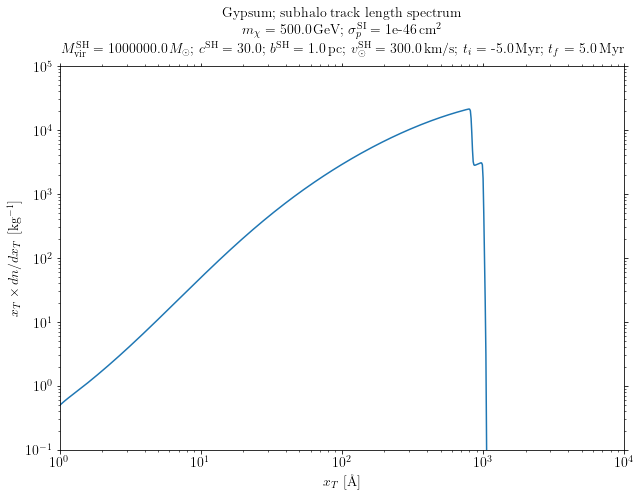

In [5]:
# let's compute the (unsmeared) spectrum induced 
# by passing through a dark matter subhalo

mx = 500. # dark matter mass [GeV]
xsec = 1e-46 # Spin-independent WIMP-proton cross section [cm^2]
Msh = 1e6 # mass of the subhalo [Msol]
csh = 30. # concentration parameter of subhalo
bsh = 1. # impact parameter of subhalo encounter [pc]
vsh = 300. # relative speed wrt subhalo [km/s]
ti = -5. # time when to start signal integration [Myr] (t = 0 corresponds to time of closest approach)
tf = +5. # time when to end signal integration [Myr] (t = 0 corresponds to time of closest approach)

DM_SH = SpecCalculator.calc_dndx_sh(mx, xsec, Msh, csh, bsh, vsh, ti, tf)

# plot the spectrum
plt.close('all')
plt.plot(DM_SH[0], DM_SH[0]*DM_SH[1])

plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1e4)
plt.ylim(1e-1,1e5)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dn/dx_T$ [kg$^{-1}$]')
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+'; subhalo track length spectrum'
          +'\n'+r'$m_\chi = $ '+str(mx)+r'\,GeV; $\sigma_p^{\rm SI} = $ '+str(xsec)+r'\,cm$^2$'
          '\n'+r'$M_{\rm vir}^{\rm SH} = $ '+str(Msh)+r'\,$M_{\odot}$; $c^{\rm SH} = $ '+str(csh)+r'; $b^{\rm SH} = $ '+str(bsh)+r'\,pc; $v_\odot^{\rm SH} = $ '+str(vsh)+r'\,km/s; $t_i = $ '+str(ti)+r'\,Myr; $t_f = $ '+str(tf)+r'\,Myr',
          y=1.02)
plt.tight_layout()
plt.show()

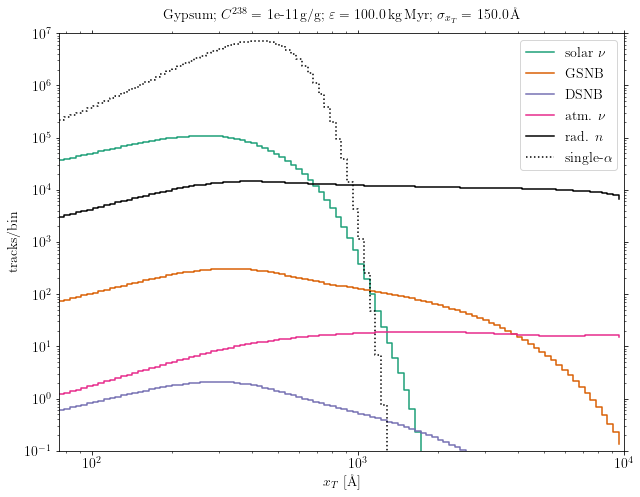

In [6]:
# let's see how to get the smeared-and-binned track length spectra

# as an example, let us compute the smeared & binned version of the
# background spectra chosen above.
# let's use 100 log-spaced bins (see CalcSpectra for additional options)

sigx = 150. # track-length resolution [Å]
nbins = 100 # number of bins

# and we will make the plot assuming some exposure defined by
MS = 0.1 # sample mass [kg]
TS = 1e3 # sample age [Myr]

sab_nu_solar = CalcSpectra.smear_and_bin(bkg_nu_solar, sigx, nbins=nbins, logbins=True)
sab_nu_GSNB = CalcSpectra.smear_and_bin(bkg_nu_GSNB, sigx, nbins=nbins, logbins=True)
sab_nu_DSNB = CalcSpectra.smear_and_bin(bkg_nu_DSNB, sigx, nbins=nbins, logbins=True)
sab_nu_atm = CalcSpectra.smear_and_bin(bkg_nu_atm, sigx, nbins=nbins, logbins=True)
sab_rad_n = CalcSpectra.smear_and_bin(bkg_rad_n, sigx, nbins=nbins, logbins=True)
# and there is a special function to compute the single-alpha background
sab_rad_1a = SpecCalculator.smear_and_bin_1a(C238, sigx, nbins=nbins, logbins=True)

# plot the spectra
plt.close('all')
plt.plot(sab_nu_solar[0][:-1], MS*TS*sab_nu_solar[1], drawstyle='steps-post', color=plt_colors[1], label=r'solar $\nu$')
plt.plot(sab_nu_GSNB[0][:-1], MS*TS*sab_nu_GSNB[1], drawstyle='steps-post', color=plt_colors[2], label=r'GSNB')
plt.plot(sab_nu_DSNB[0][:-1], MS*TS*sab_nu_DSNB[1], drawstyle='steps-post', color=plt_colors[3], label=r'DSNB')
plt.plot(sab_nu_atm[0][:-1], MS*TS*sab_nu_atm[1], drawstyle='steps-post', color=plt_colors[4], label=r'atm. $\nu$')
plt.plot(sab_rad_n[0][:-1], MS*TS*sab_rad_n[1], drawstyle='steps-post', color=plt_colors[0], label=r'rad. $n$')
plt.plot(sab_rad_1a[0][:-1], MS*sab_rad_1a[1], drawstyle='steps-post', color=plt_colors[0], linestyle=':', label=r'single-$\alpha$')

plt.xscale('log')
plt.yscale('log')
plt.xlim(sigx/2,1e4)
plt.ylim(1e-1,1e7)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'tracks/bin')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral
          +r'; $C^{238} = $ '+str(C238)+r'\,g/g'
          +r'; $\varepsilon = $ '+str(MS*TS)+r'\,kg\,Myr'
          +r'; $\sigma_{x_T} = $ '+str(sigx)+r'\,\AA',
          y=1.02)
plt.tight_layout()
plt.show()